# Step 1:  Brief description of the problem and data

Twitter has grown to be a crucial communication tool during emergencies.Smartphones are so common that anyone can instantly report an emergency they are witnessing. As a result, more organizations—such as news companies and disaster relief organizations—are interested in automating Twitter monitoring.

The dataset is in csv format with 5 columns.The first column is "id" of the datapoint,second column is the "keyword" which holds info about the important words like "ABLAZE",the third column is "text" which holds the tweets and the last column is the "target" which hold if the tweet is really reporting an emergency.The total number of datapoints is 7613.

# Step 2:  Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from collections import Counter
import re
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from tensorflow.keras.utils import pad_sequences

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df.set_index("id",inplace=True)
df.drop(["keyword","location"],axis  = 1,inplace = True)
df

,text,target
id,,
1,Our Deeds are the Reason of this #earthquake M...,1
4,Forest fire near La Ronge Sask. Canada,1
5,All residents asked to 'shelter in place' are ...,1
6,"13,000 people receive #wildfires evacuation or...",1
7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
10869,Two giant cranes holding a bridge collapse int...,1
10870,@aria_ahrary @TheTawniest The out of control w...,1
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


**Statistics of the data**

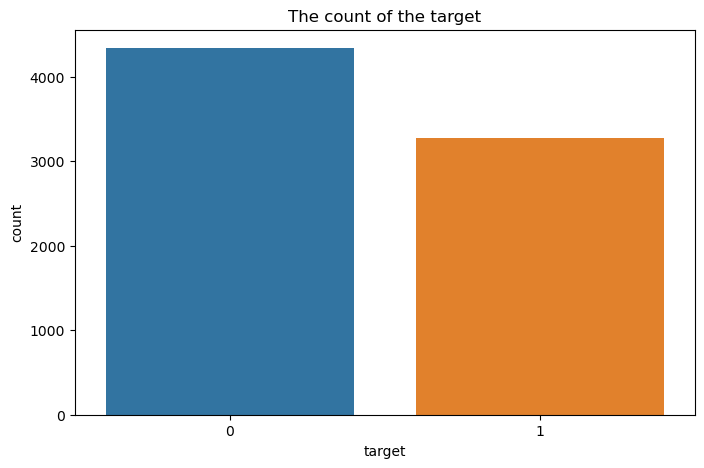

In [4]:
plt.figure(figsize=(8,5))
plt.title("The count of the target")
sns.countplot(x = df.target)
plt.show()

Tweet string length plot

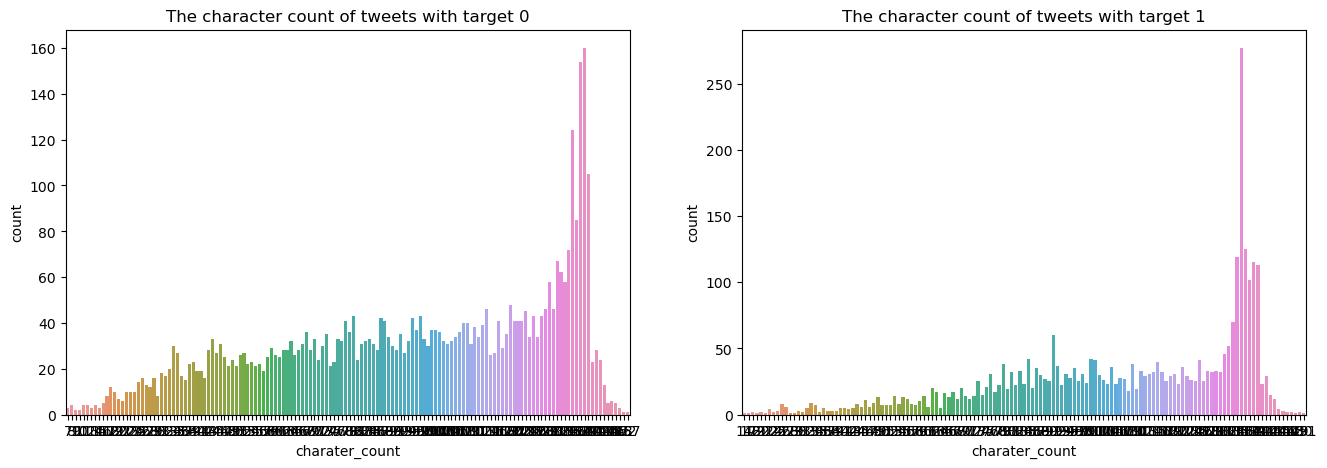

In [5]:
df["charater_count"] = df["text"].apply(len)
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("The character count of tweets with target 0")
sns.countplot(x = df[df.target == 0].charater_count)
plt.subplot(122)
plt.title("The character count of tweets with target 1")
sns.countplot(x = df[df.target == 1].charater_count)
plt.show()

kde plot of tweet string length

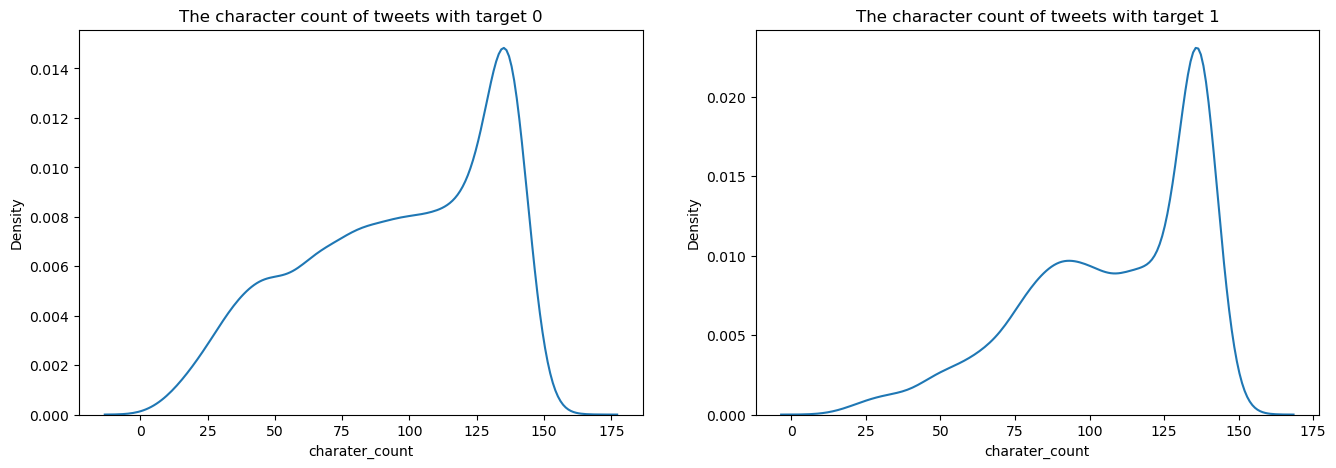

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("The character count of tweets with target 0")
sns.kdeplot(x = df[df.target == 0].charater_count)
plt.subplot(122)
plt.title("The character count of tweets with target 1")
sns.kdeplot(x = df[df.target == 1].charater_count)
plt.show()

**kde plot of tweet word string length**

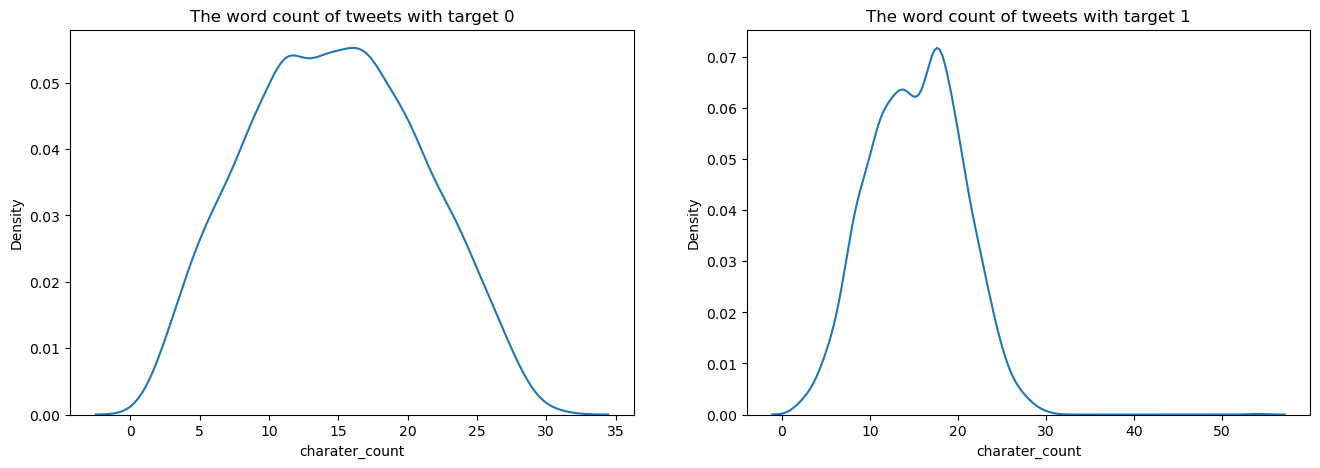

In [7]:
df["charater_count"] = df["text"].apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("The word count of tweets with target 0")
sns.kdeplot(x = df[df.target == 0].charater_count)
plt.subplot(122)
plt.title("The word count of tweets with target 1")
sns.kdeplot(x = df[df.target == 1].charater_count)
plt.show()

**Cleaning the text**

In [9]:
def cleaned(text):
    text = re.sub(r"\n","",text)
    text = text.lower()
    text = re.sub(r"\d","",text)        #Remove digits
    text = re.sub(r'[^\x00-\x7f]',r' ',text) # remove non-ascii
    text = re.sub(r'[^\w\s]','',text) #Remove punctuation
    text = re.sub(r'http\S+|www.\S+', '', text) #Remove http
    return text

# Define a function to remove stopwords from a single tweet
def remove_stopwords(tweet):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(tweet)
    filtered_tweet = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_tweet)

In [10]:
# Stemming
def stem_text(text):
    stemmer = PorterStemmer()

    words = nltk.word_tokenize(text)

    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

# Example usage:
input_text = "The quick brown foxes jumped over the lazy dogs"
stemmed_result = stem_text(input_text)
print(stemmed_result)

the quick brown fox jump over the lazi dog


In [11]:
df["text"] = df["text"].apply(cleaned)
df["text"] = df["text"].apply(remove_stopwords)
#df["text"] = df["text"].apply(stem_text)
df

,text,target,charater_count
id,,,
1,deeds reason earthquake may allah forgive us,1,13
4,forest fire near la ronge sask canada,1,7
5,residents asked shelter place notified officer...,1,22
6,people receive wildfires evacuation orders cal...,1,9
7,got sent photo ruby alaska smoke wildfires pou...,1,17
...,...,...,...
10869,two giant cranes holding bridge collapse nearb...,1,11
10870,aria_ahrary thetawniest control wild fires cal...,1,20
10871,utckm volcano hawaii,1,8


**Most Frequent word analysis**

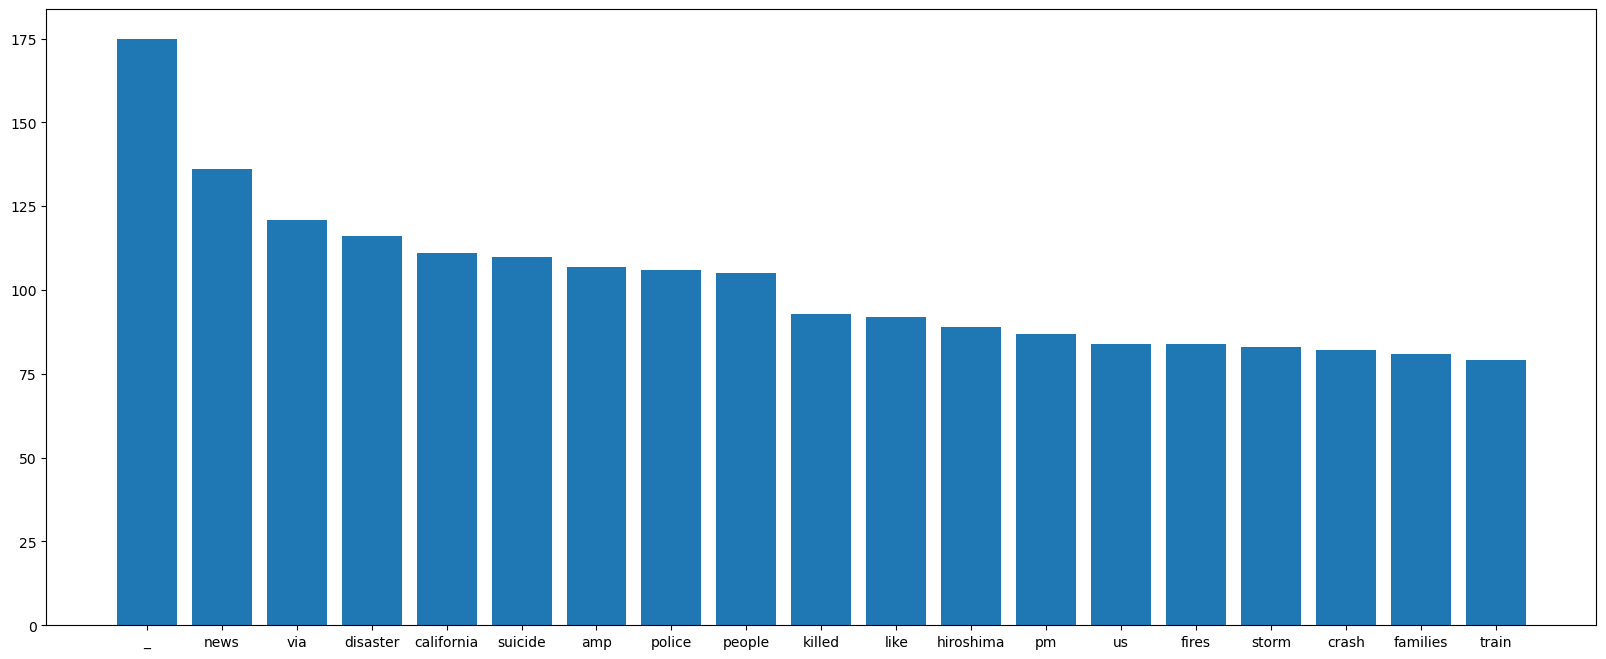

In [12]:
# For Disaster tweets
n = 20
tweets = df[df.target == 1].text.apply(lambda x : x.split(' ')).tolist()

def func(x,y):
    return x + y

all_words = reduce(func,tweets)
freq_all_words = Counter(all_words)

# Sort the dictionary by values (ascending order)
sorted_data = sorted(freq_all_words.items(), key=lambda x: x[1],reverse=True)
sorted_data = pd.DataFrame(sorted_data,columns=["word","frequency"])

plt.figure(figsize=(20,8))
plt.bar(sorted_data.word[1:n],sorted_data.frequency[1:n])
plt.show()

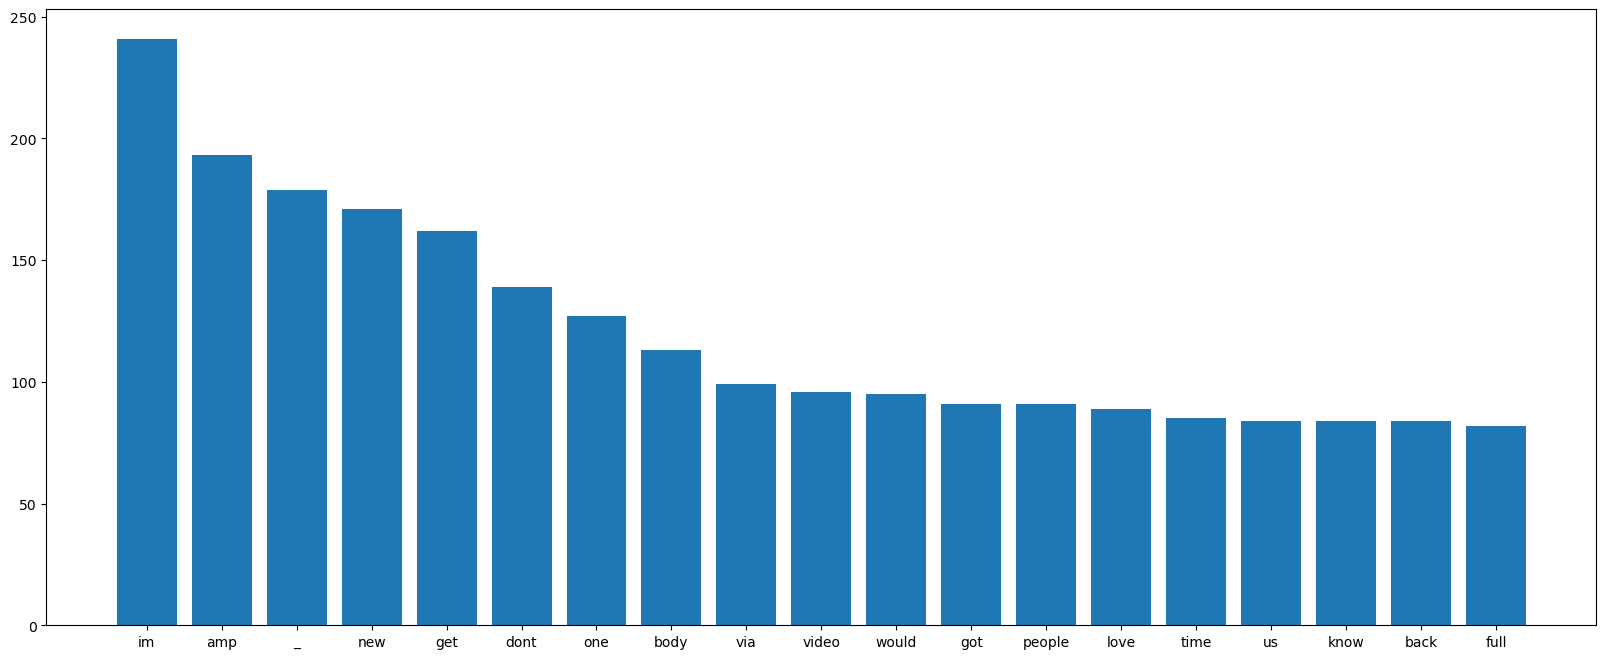

In [13]:
# For non - Disaster tweets
tweets = df[df.target == 0].text.apply(lambda x : x.split(' ')).tolist()

def func(x,y):
    return x + y

all_words = reduce(func,tweets)
freq_all_words = Counter(all_words)

# Sort the dictionary by values (ascending order)
sorted_data = sorted(freq_all_words.items(), key=lambda x: x[1],reverse=True)
sorted_data = pd.DataFrame(sorted_data,columns=["word","frequency"])

plt.figure(figsize=(20,8))
plt.bar(sorted_data.word[1:n],sorted_data.frequency[1:n])
plt.show()

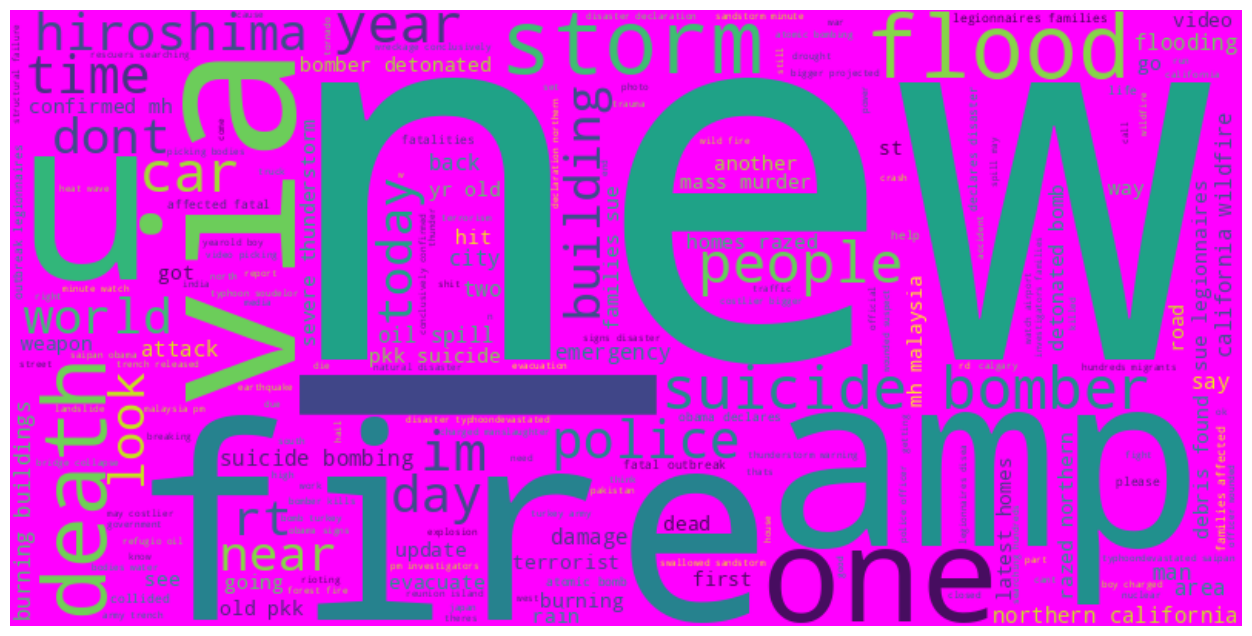

In [14]:
# For Disaster tweets
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df[df['target'] == 1]['text'].values)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='magenta').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

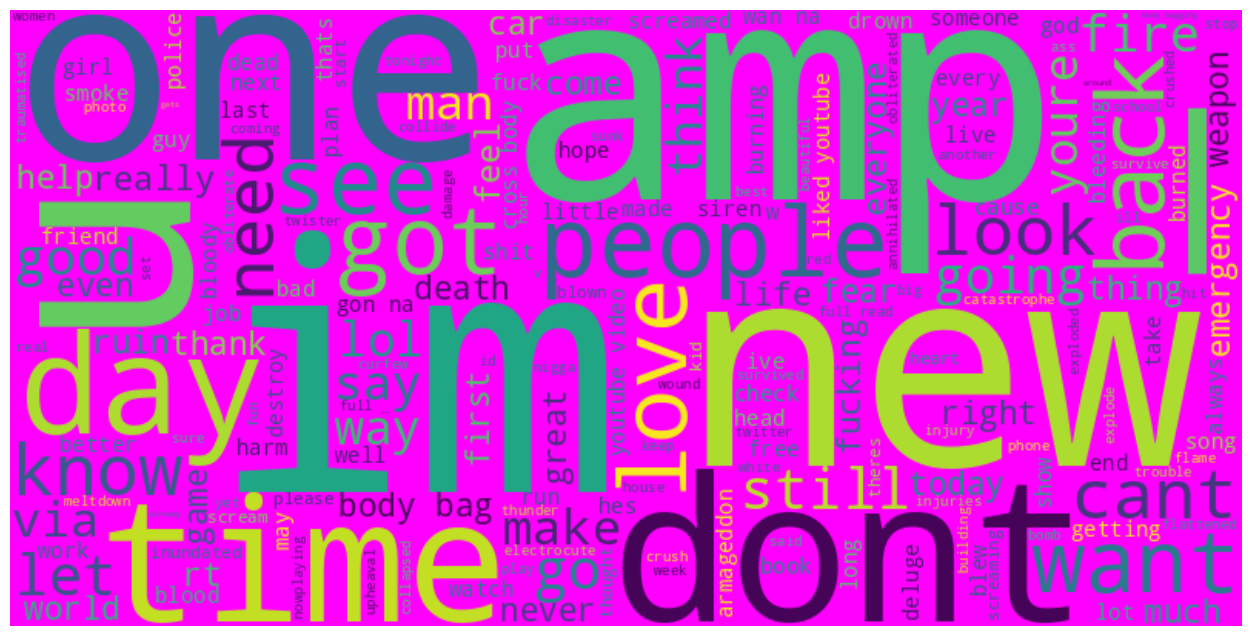

In [15]:
# For non Disaster tweets
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df[df['target'] == 0]['text'].values)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='magenta').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Step 3 : Model Building and Analysis**

**Word2Vec**

In [16]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [17]:
glove_vectorizers = gensim.downloader.load('glove-twitter-25')
glove_vectorizers

[==================================================] 100.0% 104.8/104.8MB downloaded


In [18]:
def vectorizer(text,max_pad = 30):
  tokens = text.split()
  no_of_tokens = len(tokens)
  vecs = []
  for token in tokens:
    try:
      vec = glove_vectorizers[token]
      vec = np.expand_dims(vec,0)
      vecs.append(vec)
    except:
      pass

  pad_arr = np.zeros((max_pad-len(vecs),25))
  vecs.append(pad_arr)

  vecs = np.concatenate(vecs,axis = 0)
  return np.expand_dims(vecs,axis = 0)

def list_vectorizer(text_list,max_pad = 30):
  vecs = []
  for text in text_list:
    vecs.append(vectorizer(text,max_pad))

  return np.concatenate(vecs,axis = 0)

In [19]:
X_train = list_vectorizer(df['text'])
y_train = df['target'].values

In [20]:
X_train.shape,y_train.shape

((7613, 30, 25), (7613,))

**Model Building**

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
max_sequence_length = 30

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(max_sequence_length, 25)))  # CurrentLSTM units
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 9s 36ms/step - loss: 0.5154 - accuracy: 0.7578 - val_loss: 0.4358 - val_accuracy: 0.8070
Epoch 2/10
191/191 [==============================] - 6s 33ms/step - loss: 0.4754 - accuracy: 0.7880 - val_loss: 0.4457 - val_accuracy: 0.8037
Epoch 3/10
191/191 [==============================] - 6s 34ms/step - loss: 0.4602 - accuracy: 0.7952 - val_loss: 0.4457 - val_accuracy: 0.7932
Epoch 4/10
191/191 [==============================] - 6s 32ms/step - loss: 0.4626 - accuracy: 0.7944 - val_loss: 0.4313 - val_accuracy: 0.8116
Epoch 5/10
191/191 [==============================] - 6s 33ms/step - loss: 0.4450 - accuracy: 0.8011 - val_loss: 0.4721 - val_accuracy: 0.7965
Epoch 6/10
191/191 [==============================] - 6s 33ms/step - loss: 0.4394 - accuracy: 0.8089 - val_loss: 0.4303 - val_accuracy: 0.8030
Epoch 7/10
191/191 [==============================] - 6s 34ms/step - loss: 0.4406 - accuracy: 0.8074 - val_loss: 0.4342 - val_accuracy: 0.8102

**Model Evaluation**

In [23]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
df.set_index("id",inplace=True)
df.drop(["keyword","location"],axis  = 1,inplace = True)
df.head()

,text
id,
0,Just happened a terrible car crash
2,"Heard about #earthquake is different cities, s..."
3,"there is a forest fire at spot pond, geese are..."
9,Apocalypse lighting. #Spokane #wildfires
11,Typhoon Soudelor kills 28 in China and Taiwan


In [24]:
df["text"] = df["text"].apply(cleaned)
df["text"] = df["text"].apply(remove_stopwords)
df.head()

,text
id,
0,happened terrible car crash
2,heard earthquake different cities stay safe ev...
3,forest fire spot pond geese fleeing across str...
9,apocalypse lighting spokane wildfires
11,typhoon soudelor kills china taiwan


In [25]:
X_test = list_vectorizer(df['text'])
y_test = model.predict(X_test)
y_test = (y_test > 0.5).astype(int)
y_test

102/102 [==============================] - 2s 12ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [26]:
df['target'] = y_test
df.drop(['text'],axis = 1,inplace = True)
df.to_csv('submission.csv')

# **Conclusion**

The model presented here is the an LSTM model which has one neuron at the end which predict if the given text is a disaster tweet or not.The model takes and input of vector dimension 30 cross 25 where 30 is the max sentence length(padding applied) and 25 being the embedding size(each word is converted 25 cross 1 vector using glove embedding).

The model predicts the tweets(disasterious and non disastorous) with an accuracy of 78.2%.